In [23]:
%load_ext autoreload
%autoreload 2

from codes.Kalman import *
from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression

%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16, 9)

import pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [42]:
### IMPORTANT PARAMETERS

# variance of the random white noise of z
variance_unobs_comp = 1

# variance of the observation error used in Kalman
variance_obs_comp = 0.0001

# number of SEM iterations
nb_iter_SEM = 30

In [51]:
### NAO-BLO DATA

# read the datasets
y = array(pandas.read_csv('/home/administrateur/Dropbox/Documents/Codes/Python/AnDA/AnDA_data/NAO_BLO_EOF_1979_2020.csv', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
t = range(shape(y)[0])

### V1: $x = [\alpha_1, \dots, \alpha_{10}, z_1]$

Text(0.5, 1.0, 'Initial x')

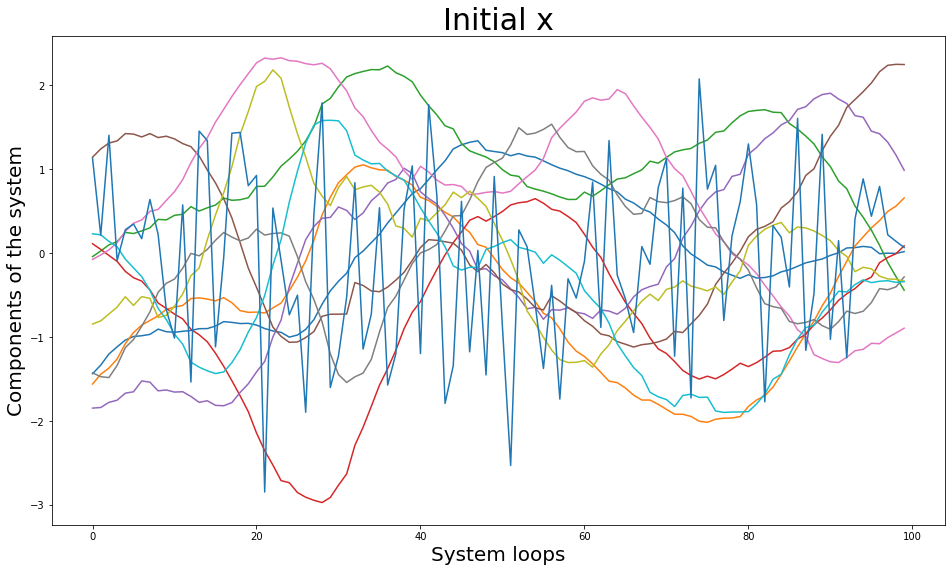

In [55]:
# state
z = random.normal(loc=y[:,0]*0, scale=variance_unobs_comp, size=shape(y)[0])
x = c_[y, z]

# shapes
n = shape(x)[1]
p = shape(y)[1]

# colors and labels of the components
#tab_colors = ['tab:blue', 'tab:orange', 'tab:green']
#tab_labels = ['$x_2$', '$x_3$', '$z_1$']

# plot the components
plot(t[0:100], x[0:100,:])
xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
#legend(tab_labels, loc=1, fontsize='xx-large')
title('Initial x', size=30)

In [48]:
# kalman parameters
H = delete(eye(n), 10, axis=0)
R = variance_obs_comp*eye(p)

# stochastic EM
x_s_V1, P_s_V1, M_V1, loglik_V1, x, x_f_V1 = Kalman_SEM(x, y, H, R, nb_iter_SEM)

100%|██████████| 30/30 [29:06<00:00, 58.22s/it]


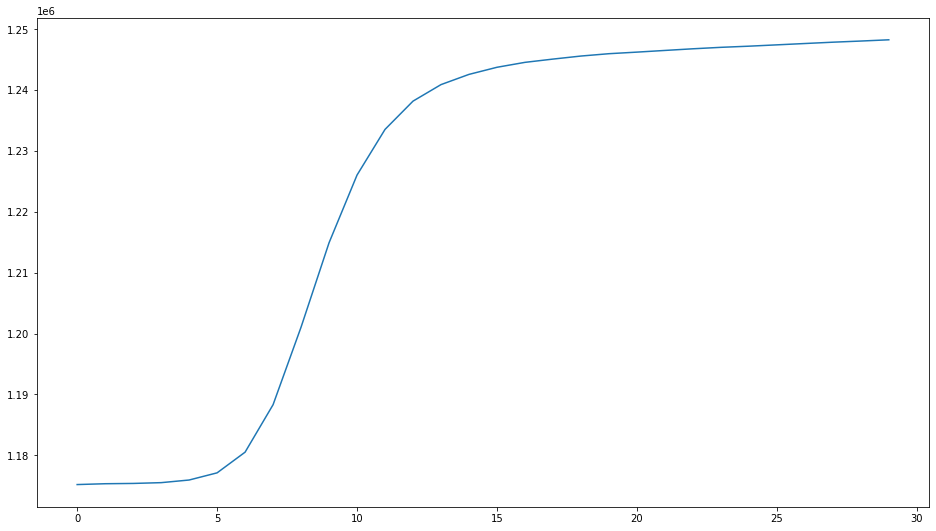

In [49]:
# check the likelihood
plot(loglik_V1)

Text(0.5, 1.0, 'Final x')

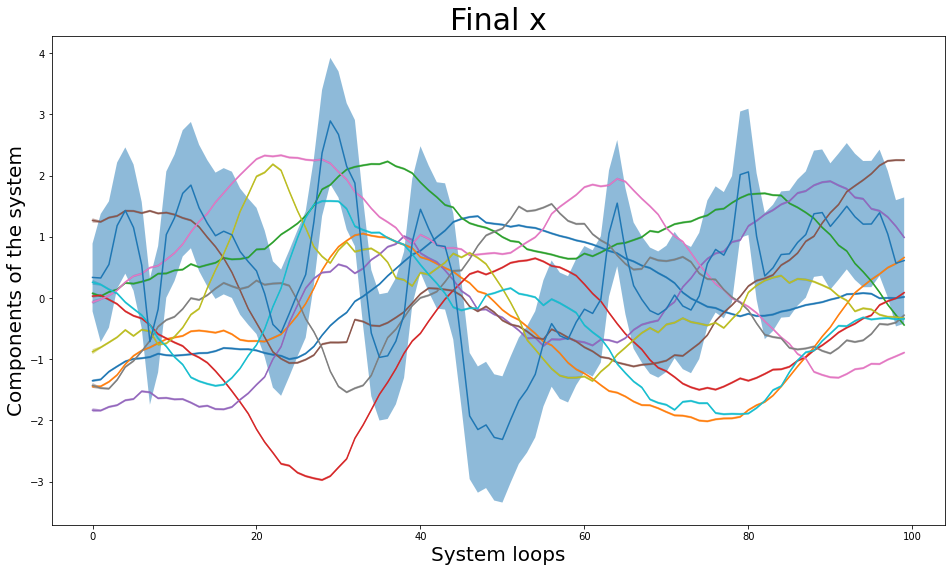

In [77]:
# plot the reconstructed components
for i in range(n):
    plot(t[0:100], x_s_V1[0:100,i])
    fill_between(t[0:100], x_s_V1[0:100,i]-1.96*sqrt(P_s_V1[0:100,i,i]), x_s_V1[0:100,i]+1.96*sqrt(P_s_V1[0:100,i,i]), alpha=0.50)

xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
title('Final x', size=30)

### V2: $x = [\alpha_1, \alpha_{2}, z_1]$

Text(0.5, 1.0, 'Initial x')

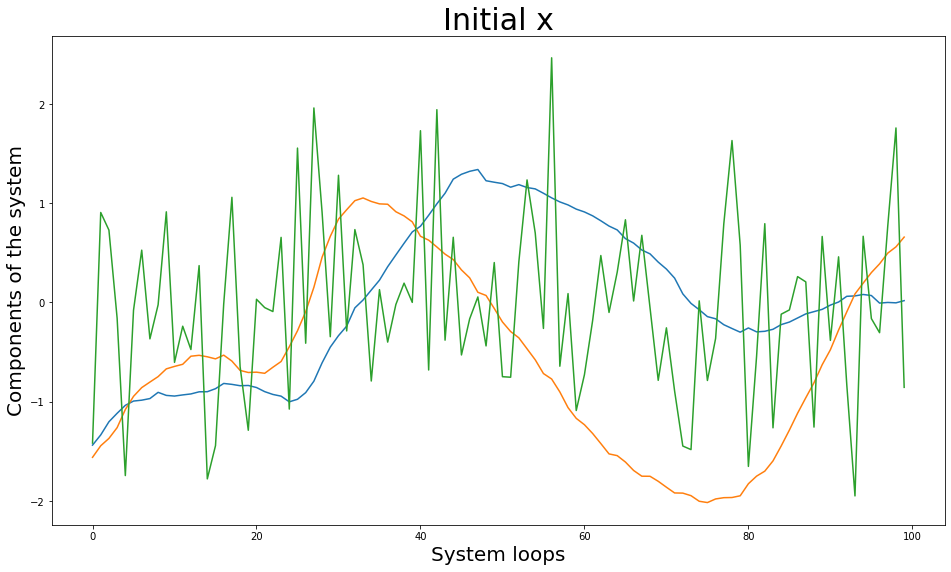

In [81]:
# state
z = random.normal(loc=y[:,0]*0, scale=variance_unobs_comp, size=shape(y)[0])
x = c_[y[:,0:2], z]

# shapes
n = shape(x)[1]
p = shape(y[:,0:2])[1]

# colors and labels of the components
#tab_colors = ['tab:blue', 'tab:orange', 'tab:green']
#tab_labels = ['$x_2$', '$x_3$', '$z_1$']

# plot the components
plot(t[0:100], x[0:100,:])
xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
#legend(tab_labels, loc=1, fontsize='xx-large')
title('Initial x', size=30)

In [84]:
# kalman parameters
H = delete(eye(n), 2, axis=0)
R = variance_obs_comp*eye(p)

print(H)

# stochastic EM
x_s_V2, P_s_V2, M_V2, loglik_V2, x, x_f_V2 = Kalman_SEM(x, y[:,0:2], H, R, nb_iter_SEM)

[[1. 0. 0.]
 [0. 1. 0.]]


100%|██████████| 30/30 [11:38<00:00, 23.29s/it]


In [78]:
# add z1 to the csv file
df_final = pandas.read_csv('/home/administrateur/Dropbox/Documents/Codes/Python/AnDA/AnDA_data/NAO_BLO_EOF_1979_2020.csv')
df_final.insert(11, "z1", x_s_V1[:,10])
df_final.to_csv('/home/administrateur/Dropbox/Documents/Codes/Python/AnDA/AnDA_data/NAO_BLO_EOF_1979_2020_z1.csv', index=False)